# Data to Graph

Preprocessing code to put the traffic data into a Graph data structure.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation, PillowWriter

import networkx as nx
from torch_geometric.utils import to_networkx

from datautils import make_graph_sequence, plot_traffic_graph

In [2]:
def animate_traffic_graphs(graph_list, filename='traffic_animation_short.gif', interval=500, time_offset=0):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(7, 15), dpi=50)
    cols = 4

    # Initialize the plot with the first graph in the list
    initial_graph = graph_list[0]
    undirected_networkx_graph = to_networkx(initial_graph, to_undirected=True)
    intensity_values = initial_graph.x[:, 1].numpy()
    cmap = cm.RdYlGn
    node_colors = [cmap(value) for value in intensity_values]
    pos = {i: (i % cols, -i // cols) for i in range(len(initial_graph.x))}
    labels = {i: i for i in range(len(initial_graph.x))}
    nx.draw(undirected_networkx_graph, pos=pos, ax=ax, with_labels=True, labels=labels, font_weight='bold', node_color=node_colors, font_color='black')
    plt.title("Traffic Speed", fontsize=32)

    # Animation update function
    def update(frame):
        ax.clear()
        current_graph = graph_list[frame]
        undirected_networkx_graph = to_networkx(current_graph, to_undirected=True)
        intensity_values = current_graph.x[:, 1].numpy()
        cmap = cm.RdYlGn
        node_colors = [cmap(value) for value in intensity_values]
        pos = {i: (i % cols, -i // cols) for i in range(len(current_graph.x))}
        labels = {i: i for i in range(len(current_graph.x))}
        nx.draw(undirected_networkx_graph, pos=pos, ax=ax, with_labels=True, labels=labels, font_weight='bold', node_color=node_colors, font_color='black')

        now = datetime.now()
        time_from_seconds = now.replace(hour=time_offset, minute=0, second=0, microsecond=0) + timedelta(seconds=frame*30)
        plt.title(f'Traffic Speed (Time: {time_from_seconds.strftime("%H:%M:%S")})', fontsize=32)

    # Create the animation
    animation = FuncAnimation(fig, update, frames=len(graph_list), interval=interval)

    # Save the animation as a GIF using PillowWriter
    animation.save(filename, writer=PillowWriter(fps=20))


In [3]:
morning_indices = list(range(1441)) # time index of morning data
six_to_seven = list(range(120*6, 120*7)) # time index 6-7 am
five_to_ten = list(range(120*5, 120*10)) # time index 5-10 am

graph_sequence = make_graph_sequence(1, morning_indices) # makes graph time series

In [29]:
def plot_traffic_graph(graph):
    undirected_networkx_graph = to_networkx(graph, to_undirected=True)

    intensity_values = graph.x[:, 1].numpy() # color is based on speed

    cmap = cm.RdYlGn

    node_colors = [cmap((value)) for value in intensity_values] # calculate colors based on speed
    
    rows = len(graph.x) // 4  # Calculate the number of rows in the grid
    cols = 4

    # Calculate positions for each node in the grid
    pos = {i: (i % cols, -i // cols) for i in range(len(graph.x))}
    
    labels = {i: i for i in range(len(graph.x))}  # Node labels

    fig = plt.figure(figsize=(7,15))
    
    ax = plt.subplot(111)
    # Draw nodes and edges
    nx.draw(undirected_networkx_graph, pos=pos, ax=ax, with_labels=True, labels=labels,
            node_color=node_colors, font_color='black')
    plt.title("Traffic Speed (7 am)", fontsize=32)
    plt.show()

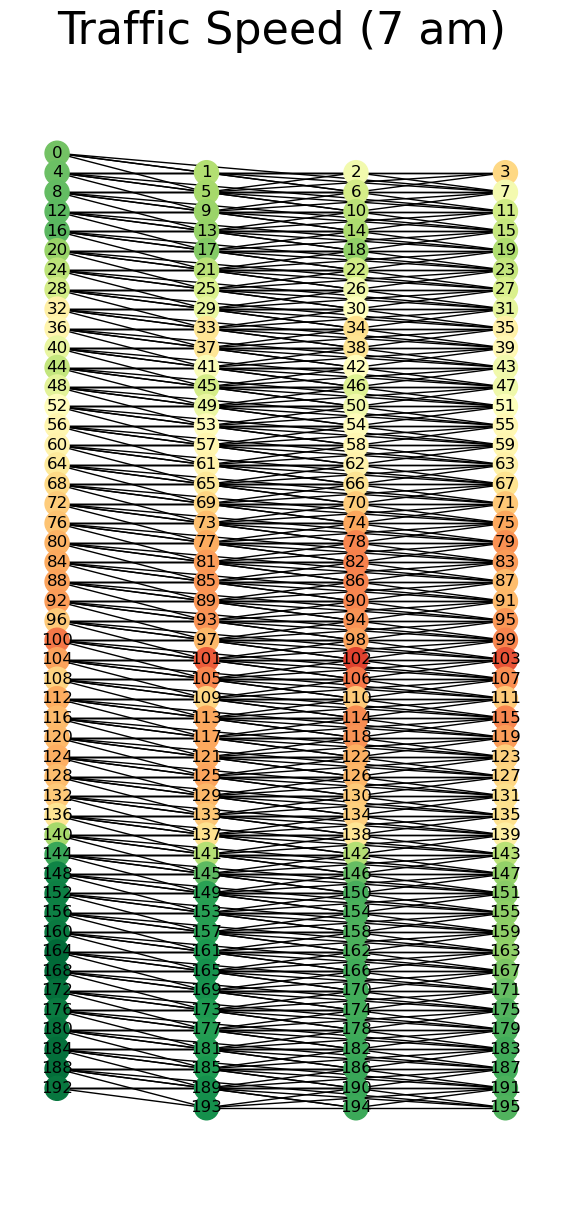

In [30]:
plot_traffic_graph(graph_sequence[120*7])

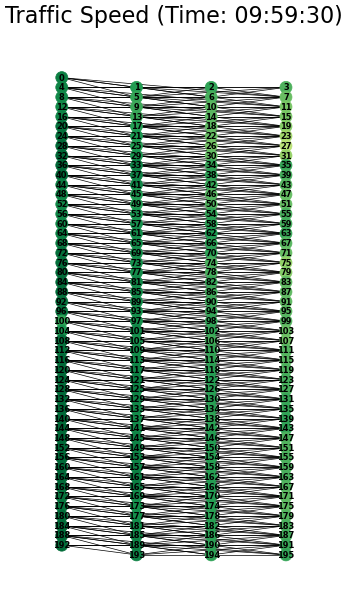

In [35]:
animate_traffic_graphs(graph_sequence, filename="../figures/five_to_ten.gif", time_offset=5)